In [1]:
# (Run First) Import prior and packages
import matplotlib.pyplot as plt
import numpy as np
import getdist
from getdist import plots, MCSamples
import statistics
import matplotlib.ticker as ticker
import pandas as pd
import scipy.stats as ss
import math

# Import Original EOS and MR data
goldEOS = np.loadtxt("FSUGOLD_EOS.txt")
garnetEOS = np.loadtxt("FSUGARNET_EOS.txt")
goldMR = np.loadtxt("FSUGOLD_RM.txt")
garnetMR = np.loadtxt("FSUGARNET_RM.txt")
goldMR_XEFT = np.loadtxt("FSUGOLD_XEFT_RM.txt")
garnetMR_XEFT = np.loadtxt("FSUGARNET_XEFT_RM.txt")

# Import PNM data
goldPNM = np.loadtxt("FSUGOLD_PNM.txt")
garnetPNM = np.loadtxt("FSUGARNET_PNM.txt")
goldPNM_XEFT = np.loadtxt("FSUGOLD_XEFT_PNM.txt")
garnetPNM_XEFT = np.loadtxt("FSUGARNET_XEFT_PNM.txt")
data = np.loadtxt("XEFTNM.txt")   # EOS to import

# Data is of the following form (BA, kf, mstar, K, J, L, h, R1.44, R2.08, icp1.44, icp2.08, R_1.4, TD1.4, Mmax, icpMmax)
priorgold = np.loadtxt("prior_FSUGOLD.txt")
priorgarnet = np.loadtxt("prior_FSUGARNET.txt")
postgold_A = np.loadtxt("postAstro_FSUGOLD.txt")
postgarnet_A = np.loadtxt("postAstro_FSUGARNET.txt")
postgold_X = np.loadtxt("postXEFT_FSUGOLD.txt")
postgarnet_X = np.loadtxt("postXEFT_FSUGARNET.txt")

# Maximum mass change after Astrophysics
print('Mmax prior = ' + str(statistics.mean(priorgold[0:,13])) + '+/-' + str(statistics.stdev(priorgold[0:,13])))
print('Mmax Astro = ' + str(statistics.mean(postgold_A[0:,13])) + '+/-' + str(statistics.stdev(postgold_A[0:,13])))

print('                          ')
print('FSUGold2 Posterior')
# Parameters for FSU GOLD POST XEFT
print('BA = ' + str(statistics.mean(postgold_X[:,0])))
print('kf = ' + str(statistics.mean(postgold_X[:,1])))
print('m*/m = ' + str(statistics.mean(postgold_X[:,2])))
print('K = ' + str(statistics.mean(postgold_X[:,3])))
print('J = ' + str(statistics.mean(postgold_X[:,4])))
print('L = ' + str(statistics.mean(postgold_X[:,5])))
print('zeta = ' + str(6.0*statistics.mean(postgold_X[:,6])))

print('                          ')
print('FSUGarnet Prior')
# Parameters for FSU GARNET POST XEFT
print('BA = ' + str(statistics.mean(priorgarnet[:,0])) + '+/-' + str(statistics.stdev(priorgarnet[:,0])))
print('kf = ' + str(statistics.mean(priorgarnet[:,1])) + '+/-' + str(statistics.stdev(priorgarnet[:,1])))
print('m*/m = ' + str(statistics.mean(priorgarnet[:,2])) + '+/-' + str(statistics.stdev(priorgarnet[:,2])))
print('K = ' + str(statistics.mean(priorgarnet[:,3])) + '+/-' + str(statistics.stdev(priorgarnet[:,3])))
print('J = ' + str(statistics.mean(priorgarnet[:,4])) + '+/-' + str(statistics.stdev(priorgarnet[:,4])))
print('L = ' + str(statistics.mean(priorgarnet[:,5])) + '+/-' + str(statistics.stdev(priorgarnet[:,5])))
print('zeta  = ' + str(6.0*statistics.mean(priorgarnet[:,6])) + '+/-' + str(statistics.stdev(priorgarnet[:,6])))


Mmax prior = 2.09765191342938+/-0.041496997900763784
Mmax Astro = 2.1124758698405+/-0.045420962065314846
                          
FSUGold2 Posterior
BA = -16.220544793532
kf = 1.3111414126696
m*/m = 0.59395222316586
K = 241.18466888182
J = 32.02624212857
L = 57.198493299681
zeta = 0.011659782411915239
                          
FSUGarnet Prior
BA = -16.2306300218422+/-0.0205265806434275
kf = 1.31379422590856+/-0.0013802455468658497
m*/m = 0.578336479027956+/-0.0039919611049553045
K = 229.604445376674+/-2.4874371745124386
J = 30.9170441954626+/-0.47168857337102504
L = 50.96186660371+/-1.5191749437197775
zeta  = 0.0234954323465268+/-0.00023914430439095827


In [2]:
# Convert h to zeta
priorgold[:,6] = priorgold[:,6]*6.0
priorgarnet[:,6] = priorgarnet[:,6]*6.0
postgold_A[:,6] = postgold_A[:,6]*6.0
postgarnet_A[:,6] = postgarnet_A[:,6]*6.0
postgold_X[:,6] = postgold_X[:,6]*6.0
postgarnet_X[:,6] = postgarnet_X[:,6]*6.0

# convert kf to p0
priorgold[:,1] = 2/(3*math.pi**2)*priorgold[:,1]**3
priorgarnet[:,1] = 2/(3*math.pi**2)*priorgarnet[:,1]**3
postgold_A[:,1] = 2/(3*math.pi**2)*postgold_A[:,1]**3
postgarnet_A[:,1] = 2/(3*math.pi**2)*postgarnet_A[:,1]**3
postgold_X[:,1] = 2/(3*math.pi**2)*postgold_X[:,1]**3
postgarnet_X[:,1] = 2/(3*math.pi**2)*postgarnet_X[:,1]**3

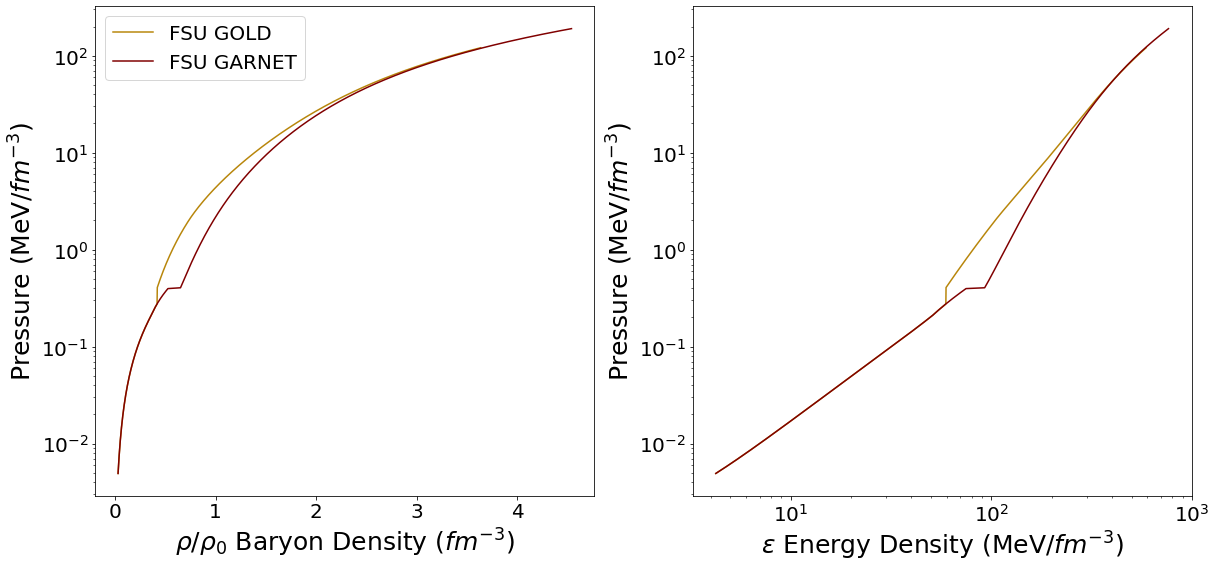

In [4]:

# EOS PLOTS AND MASS-RADIUS PLOTS
fig, axs = plt.subplots(1, 2,figsize=(17,8),sharey=False, sharex=False)

# Adjust the start and end of the EOS
l = 1500
m = 2400

# Pressure vs density
x1 = goldEOS[l:m,0]/0.15
x2 = garnetEOS[l:m,0]/0.15
axs[0].plot(x1,goldEOS[l:m,2],color='darkgoldenrod')
axs[0].plot(x2,garnetEOS[l:m,2],color='maroon')
axs[0].legend(['FSU GOLD','FSU GARNET'],fontsize=20)
axs[0].set_xlabel(r'$\rho/\rho_0$ Baryon Density ($fm^{-3}$)',fontsize=25)
axs[0].set_ylabel(r'Pressure (MeV/$fm^{-3}$)',fontsize=25)
axs[0].set_yscale('log')
axs[0].tick_params(axis='both', which='major', labelsize=20)

# Pressure vs energy density
xticks = [10,100,1000]
axs[1].plot(goldEOS[l:m,1],goldEOS[l:m,2],color='darkgoldenrod')
axs[1].plot(garnetEOS[l:m,1],garnetEOS[l:m,2],color='maroon')
axs[1].set_xlabel(r'$\epsilon$ Energy Density (MeV/$fm^{-3}$)',fontsize=25)
axs[1].set_ylabel(r'Pressure (MeV/$fm^{-3}$)',fontsize=25)
axs[1].set_yscale('log')
axs[1].set_xscale('log')
axs[1].set_xticks(xticks)
axs[1].tick_params(axis='both', which='major', labelsize=20)

plt.tight_layout()
plt.savefig("EOS_MR_PAPER.png",transparent=False,facecolor='white')

Removed no burn in
Removed no burn in


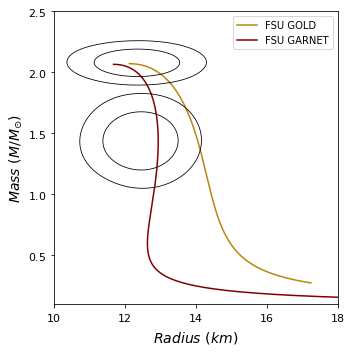

In [22]:
# Adjust for the maximum masses
gol = 426
gar = 390

# Get a sample of the mass/radius distribution
ndim = 2
nsamp = 10000
random_state = np.random.default_rng(10) # seed random generator
cov = [[0.75**2,0],[0,0.07**2]]
samps = random_state.multivariate_normal([12.35,2.08], cov, size=nsamp)
cov = [[0.65**2,0],[0,0.15**2]]
samps2 = random_state.multivariate_normal([12.45,1.44], cov, size=nsamp)

names = ['R','M']
labels = ['Radius \ (km)',r'Mass \ (M/M_{\odot})']
samples = MCSamples(samples=samps,names = names, labels = labels,settings={'smooth_scale_2D':0.9,'fine_bins_2D':100})
samples2 = MCSamples(samples=samps2,names = names, labels = labels,settings={'smooth_scale_2D':0.9,'fine_bins_2D':100})

# Plot mass and radisu with error contours
g = plots.get_subplot_plotter(width_inch=5)
samples.updateSettings({'contours': [0.68, 0.95]})
g.plot_2d([samples, samples2],'R', 'M', labels = labels, lims=[10,18,0.1,2.5],colors=['black','black'],ls=['-','-'],lws=[0.8,0.8])
g.add_line(goldMR[:gol,2],goldMR[:gol,3],ls='solid',color='darkgoldenrod')
g.add_line(garnetMR[:gar,2],garnetMR[:gar,3],ls='solid',color='maroon')

g.export('RM_Observ.png',transparent=False,facecolor='white')
plt.legend(['FSU GOLD','FSU GARNET'])

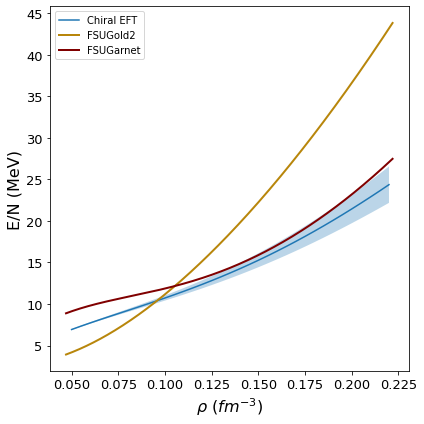

In [13]:
# Adjust end of XEFT data
n = 35

# Adjust start and end of EOS data
l = 500
m = 870

x = data[0:n,0]
y = data[0:n,1]
error1 = data[0:n,2]

# plot XEFT data and FSU PNM EOS
plt.figure(figsize=(6,6))
plt.plot(x,y)
plt.plot(goldPNM[l:m,0],goldPNM[l:m,3],color='darkgoldenrod',linewidth=2)
plt.plot(garnetPNM[l:m,0],garnetPNM[l:m,3],color='maroon',linewidth=2)
plt.fill_between(x, y-error1, y+error1, alpha=0.3)
plt.legend(['Chiral EFT','FSUGold2','FSUGarnet'])
plt.xlabel(r'$\rho$ ($fm^{-3}$)',**{'fontname':'Roman'})
plt.ylabel('E/N (MeV)',**{'fontname':'Roman'})
plt.rc('axes', labelsize=16)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.tight_layout()
plt.savefig('Prior_PNM.png',transparent=False,facecolor='white')

Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


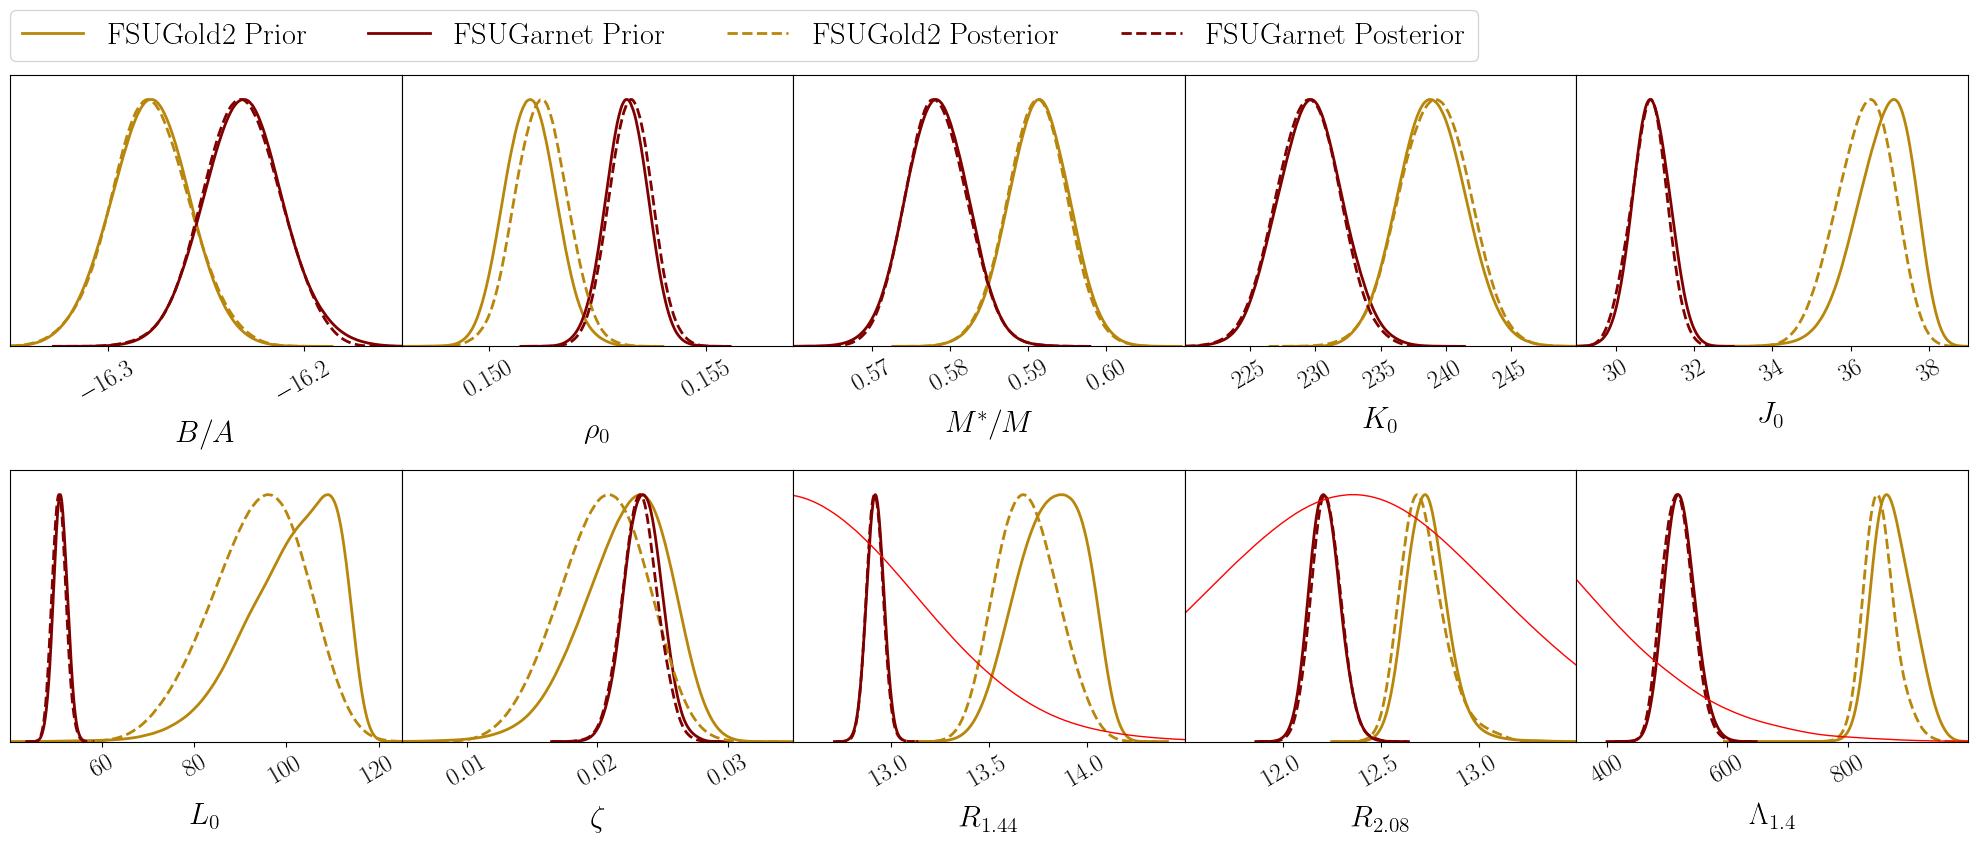

In [3]:
plt.rcParams.update({
    'text.usetex': True,
    'font.family': 'serif',
    'font.serif': ['Computer Modern'],
    'font.size': 14,
    'axes.titlesize': 14,
    'axes.labelsize': 16,
    'xtick.labelsize': 17,
    'ytick.labelsize': 17,
    'legend.fontsize': 16,
    'text.latex.preamble': r'\usepackage{bm}',
})

# Tag specific columns to plot
cols =  [0,1,2,3,4,5,6,7,8,12]
priorGOLD = priorgold[:,cols]
priorGARNET = priorgarnet[:,cols]
postGOLD_A = postgold_A[:,cols]
postGARNET_A = postgarnet_A[:,cols]

names = ['BA','p0', 'mstar', 'K', 'J', 'L', 'zeta','R1.44','R2.08','TD1.4']
labels =  ['B/A',r'\rho_0', r'M^*/M', 'K_0', 'J_0', 'L_0', r'\zeta',r'R_{1.44}',r'R_{2.08}',r'\Lambda_{1.4}']
samp_prior_gold = MCSamples(samples=priorGOLD,names = names, labels = labels)
samp_prior_garn = MCSamples(samples=priorGARNET,names = names, labels = labels)
samp_postA_gold = MCSamples(samples=postGOLD_A,names = names, labels = labels)
samp_postA_garn = MCSamples(samples=postGARNET_A,names = names, labels = labels)

# Add observational measurements 
nsamp = 100000
random_state = np.random.default_rng(10) # seed random generator
samp208 = random_state.normal(12.35, 0.75, size=nsamp)
samp144 = random_state.normal(12.45, 0.65, size=nsamp)
samp14TD = ss.skewnorm.rvs(4,loc=87,scale=247,size=nsamp)
labels = ['Radius \ (km)']
samples208 = MCSamples(samples=samp208,names = ['R2.08'], labels = labels)
samples144 = MCSamples(samples=samp144,names = ['R1.44'], labels = labels)
samples14TD = MCSamples(samples=samp14TD,names = ['TD1.4'], labels = labels)

# Properties of plot
data = [samp_prior_gold,samp_prior_garn,samp_postA_gold,samp_postA_garn,samples208,samples144,samples14TD]
vars = ['BA','p0', 'mstar', 'K', 'J', 'L', 'zeta','R1.44','R2.08','TD1.4']
leglabel = ['FSUGold2 Prior','FSUGarnet Prior','FSUGold2 Posterior','FSUGarnet Posterior']
colorsett = ['darkgoldenrod','maroon','darkgoldenrod','maroon','red','red','red']
linestyle = ['-','-','dashed','dashed']
linesize = [2,2,2,2]
xlim = [[-16.35,-16.15],[0.148,0.157],[0.56,0.61],[220,250],[29,39],[40,125],[0.005,0.035],[12.5,14.5],[11.5,13.5],[350,1000]]

# Plot astro results
g = plots.get_subplot_plotter(subplot_size=4, scaling=False)
g.settings.title_limit_fontsize = 12
g.settings.axes_fontsize = 18
g.settings.axes_labelsize = 22
g.settings.legend_fontsize = 22
g.settings.axis_tick_x_rotation = 30
g.settings.figure_legend_loc = 'upper left'

g.plots_1d(data,vars,nx=5,colors=colorsett,lws=linesize,ls=linestyle,legend_labels=leglabel,legend_ncol=4,xlims=xlim,share_y=True,normalized=False)
g.fig.savefig('Figure7.png',transparent=False,facecolor='white', pad_inches=0.5,bbox_inches='tight',dpi=500)

Removed no burn in
Removed no burn in


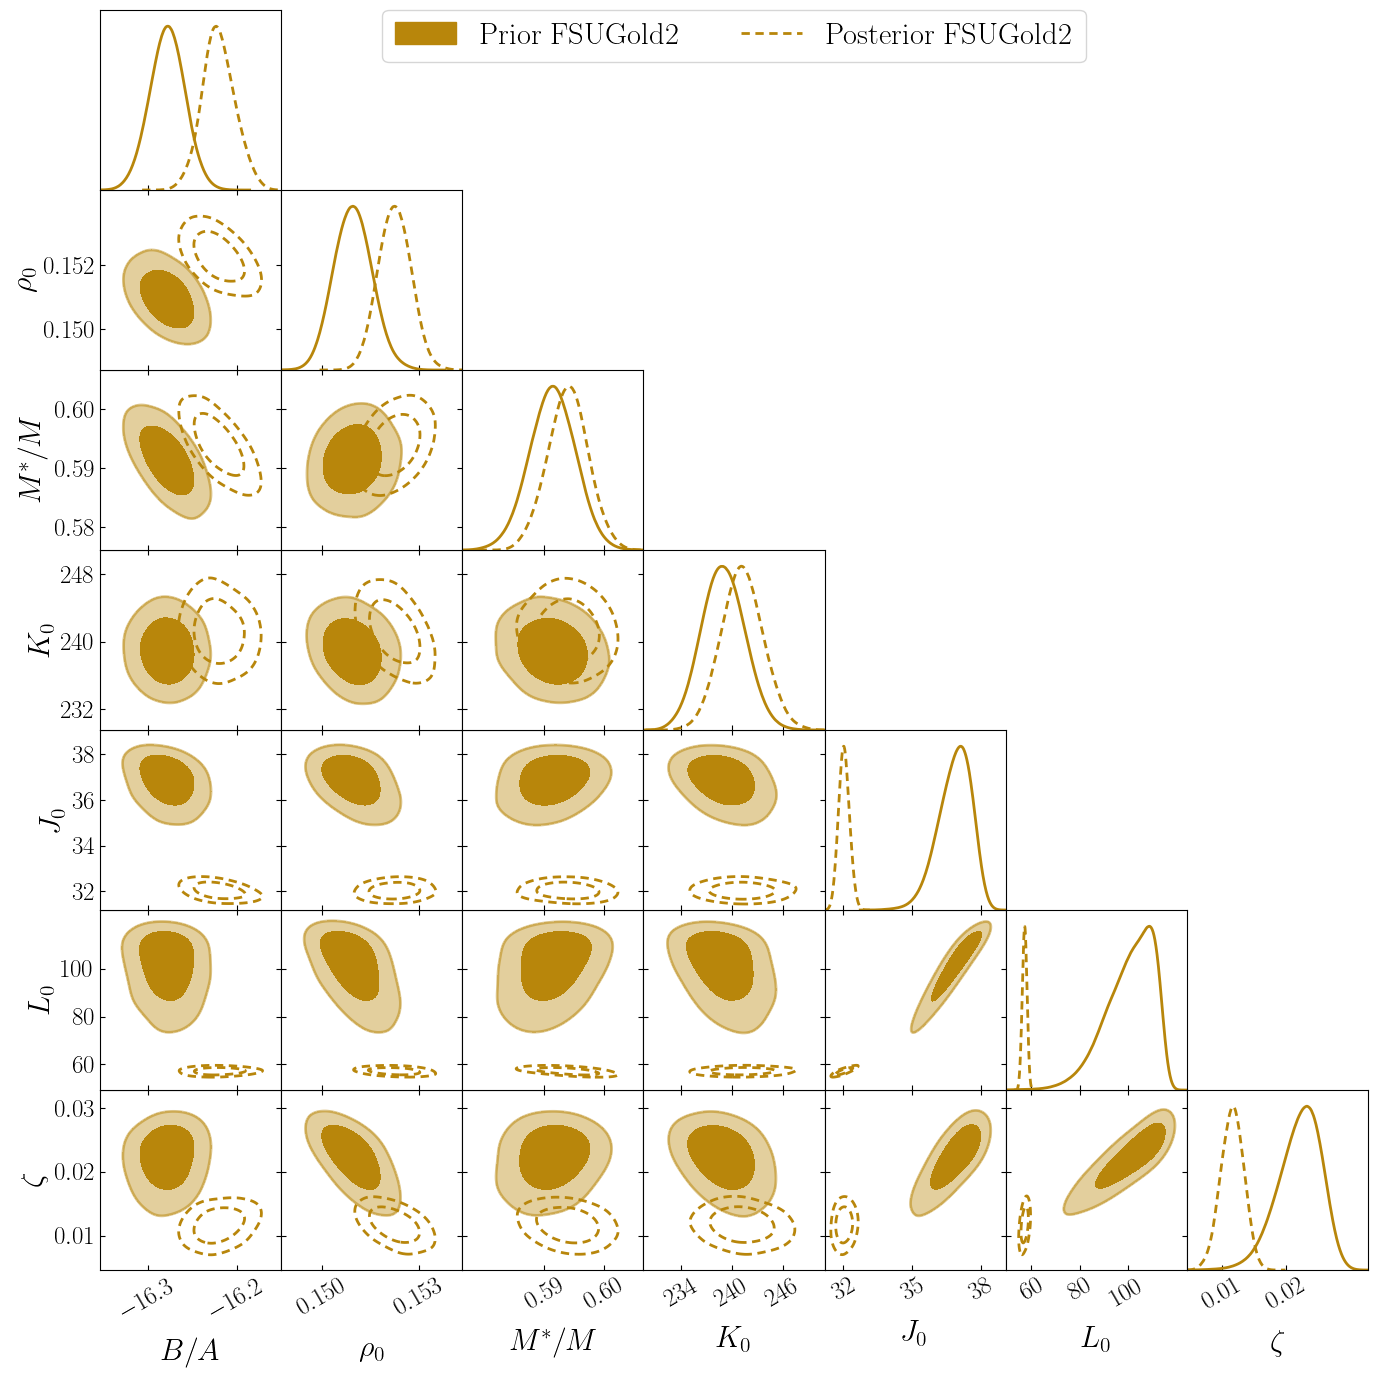

In [4]:
plt.rcParams.update({
    'text.usetex': True,
    'font.family': 'serif',
    'font.serif': ['Computer Modern'],
    'font.size': 14,
    'axes.titlesize': 14,
    'axes.labelsize': 16,
    'xtick.labelsize': 17,
    'ytick.labelsize': 17,
    'legend.fontsize': 16,
    'text.latex.preamble': r'\usepackage{bm}',
})

#Covariance Plot for FSU GOLD
priorGOLD = priorgold[:,0:7]
postGOLD_X = postgold_X[:,0:7]
names = ['BA','kf', 'mstar', 'K', 'J', 'L', 'zeta']
labels =  ['B/A',r'\rho_0', r'M^*/M', 'K_0', 'J_0', 'L_0', r'\zeta']
samp_prior_gold = MCSamples(samples=priorGOLD,names = names, labels = labels)
samp_postX_gold = MCSamples(samples=postGOLD_X,names = names, labels = labels)

# Plot properties
data = [samp_prior_gold,samp_postX_gold]
fillsett = [True,False]
leglabel = ['Prior FSUGold2','Posterior FSUGold2']
colorsett = ['darkgoldenrod','darkgoldenrod']
linestyle = ['-','--']
linesize = [2,2]

# Plot covariance after XEFT
g = plots.get_subplot_plotter(scaling=False)
g.settings.title_limit_fontsize = 12
g.settings.axes_fontsize = 18
g.settings.axes_labelsize = 22
g.settings.legend_fontsize = 22
g.settings.axis_tick_x_rotation = 30
g.triangle_plot(data, filled=fillsett,legend_labels=leglabel,contour_colors=colorsett,contour_ls=linestyle,contour_lws=linesize,legend_ncol=3)
g.fig.savefig('Figure8.png',transparent=False,facecolor='white',bbox_inches='tight',dpi=500)

Removed no burn in
Removed no burn in


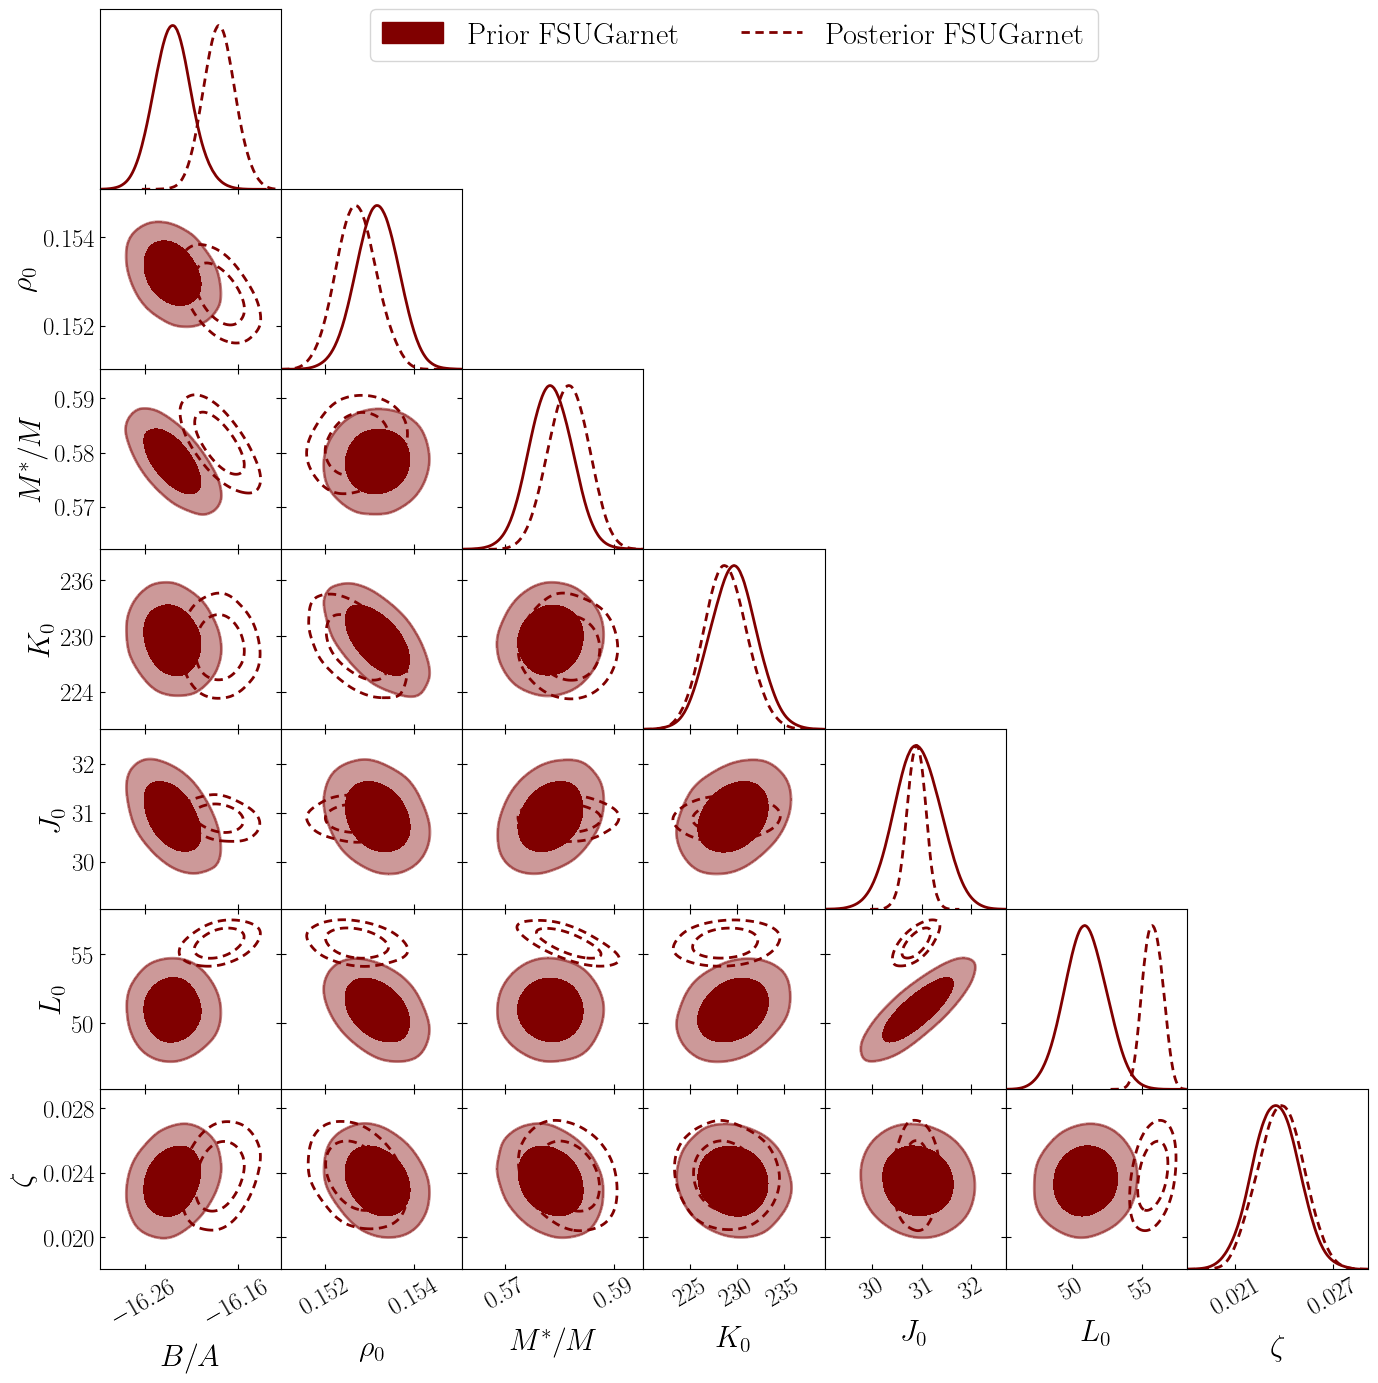

In [6]:
plt.rcParams.update({
    'text.usetex': True,
    'font.family': 'serif',
    'font.serif': ['Computer Modern'],
    'font.size': 14,
    'axes.titlesize': 14,
    'axes.labelsize': 16,
    'xtick.labelsize': 17,
    'ytick.labelsize': 17,
    'legend.fontsize': 16,
    'text.latex.preamble': r'\usepackage{bm}',
})

#Covariance Plot for FSU GARNET
priorGARNET = priorgarnet[:,0:7]
postGARNET_X = postgarnet_X[:,0:7]
names = ['BA','kf', 'mstar', 'K', 'J', 'L', 'zeta']
labels =  ['B/A',r'\rho_0', r'M^*/M', 'K_0', 'J_0', 'L_0', r'\zeta']
samp_prior_garn = MCSamples(samples=priorGARNET,names = names, labels = labels)
samp_postX_garn = MCSamples(samples=postGARNET_X,names = names, labels = labels)

# Plot properties
data = [samp_prior_garn,samp_postX_garn]
fillsett = [True,False]
leglabel = ['Prior FSUGarnet','Posterior FSUGarnet']
colorsett = ['maroon','maroon']
linestyle = ['-','--']
linesize = [2,2]

# Plot covariance after XEFT
g = plots.get_subplot_plotter(scaling=False)
g.settings.title_limit_fontsize = 12
g.settings.axes_fontsize = 18
g.settings.axes_labelsize = 22
g.settings.legend_fontsize = 22
g.settings.axis_tick_x_rotation = 30
g.triangle_plot(data, filled=fillsett,legend_labels=leglabel,contour_colors=colorsett,contour_ls=linestyle,contour_lws=linesize,legend_ncol=3,)
g.fig.savefig('Figure9.png',transparent=False,facecolor='white',bbox_inches='tight',dpi=500)

Removed no burn in
Removed no burn in


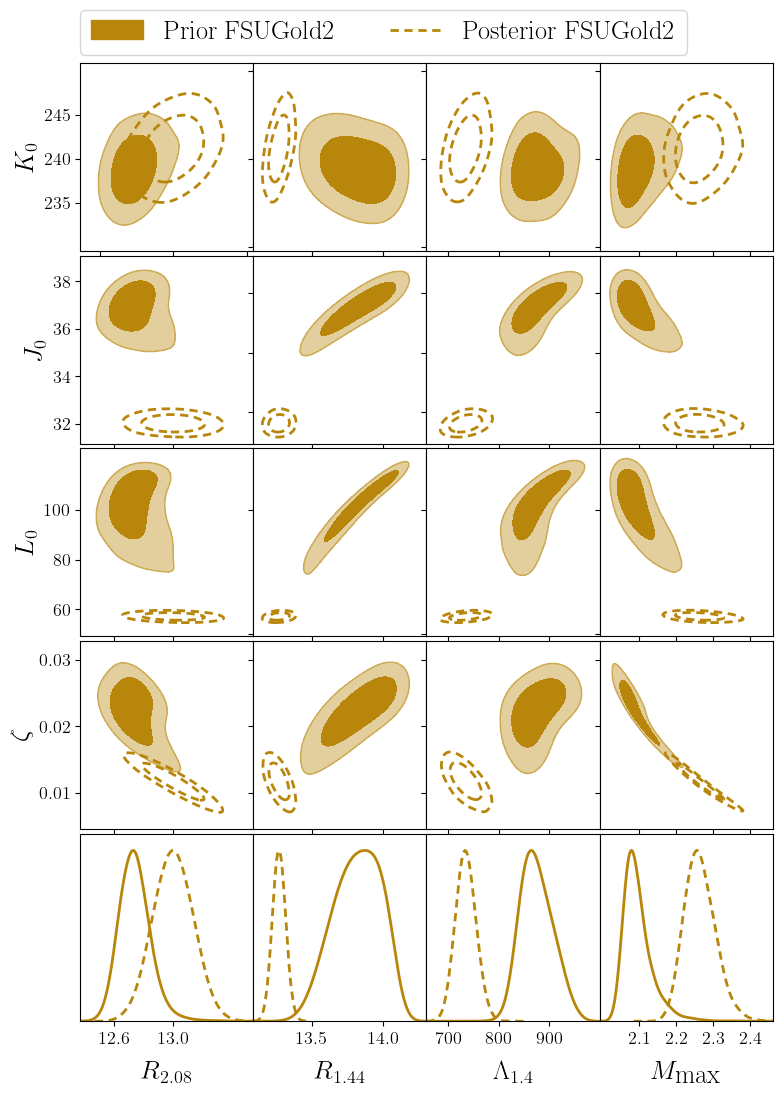

In [8]:
plt.rcParams.update({
    'text.usetex': True,
    'font.family': 'serif',
    'font.serif': ['Computer Modern'],
    'font.size': 14,
    'axes.titlesize': 14,
    'axes.labelsize': 16,
    'xtick.labelsize': 17,
    'ytick.labelsize': 17,
    'legend.fontsize': 16,
    'text.latex.preamble': r'\usepackage{bm}',
})

cols = [3,4,5,6,7,8,12,13]
priorGOLD = priorgold[:,cols]
postGOLD_X = postgold_X[:,cols]

names = ['K', 'J', 'L', 'zeta','R1.44','R2.08','TD1.4','Mmax']
labels =  ['K_0', 'J_0', 'L_0', r'\zeta',r'R_{1.44}',r'R_{2.08}',r'\Lambda_{1.4}',r'M_\textrm{max}']
samp_prior_gold = MCSamples(samples=priorGOLD,names = names, labels=labels)
samp_postX_gold = MCSamples(samples=postGOLD_X,names = names, labels=labels)

data = [samp_prior_gold,samp_postX_gold]
fillsett = [True,False]
colorsett = ['darkgoldenrod','darkgoldenrod']
linestyle = ['-','--']
linesize = [2,2]

f = plots.get_subplot_plotter(subplot_size=2)
f.settings.title_limit_fontsize = 12
f.settings.axes_fontsize = 16
f.settings.axes_labelsize = 22
f.settings.legend_fontsize = 22
f.make_figure(nplot=24,nx=4,ny=5,sharex=True,sharey=True)
f.plot_2d(data,['R2.08','K'],ax=[0,0],do_xlabel=False,no_label_no_numbers=True,filled=fillsett,colors=colorsett,ls=linestyle,lws=linesize)
f.plot_2d(data,'R1.44','K',ax=[0,1],do_ylabel=False,no_label_no_numbers=True,filled=fillsett,colors=colorsett,ls=linestyle,lws=linesize)
f.plot_2d(data,'TD1.4','K',ax=[0,2],do_ylabel=False,no_label_no_numbers=True,filled=fillsett,colors=colorsett,ls=linestyle,lws=linesize)
f.plot_2d(data,'Mmax','K',ax=[0,3],do_ylabel=False,no_label_no_numbers=True,filled=fillsett,colors=colorsett,ls=linestyle,lws=linesize)
f.plot_2d(data,'R2.08','J',ax=[1,0],filled=fillsett,colors=colorsett,ls=linestyle,lws=linesize)
f.plot_2d(data,'R1.44','J',ax=[1,1],do_ylabel=False,no_label_no_numbers=True,filled=fillsett,colors=colorsett,ls=linestyle,lws=linesize)
f.plot_2d(data,'TD1.4','J',ax=[1,2],do_ylabel=False,no_label_no_numbers=True,filled=fillsett,colors=colorsett,ls=linestyle,lws=linesize)
f.plot_2d(data,'Mmax','J',ax=[1,3],do_ylabel=False,no_label_no_numbers=True,filled=fillsett,colors=colorsett,ls=linestyle,lws=linesize)
f.plot_2d(data,'R2.08','L',ax=[2,0],filled=fillsett,colors=colorsett,ls=linestyle,lws=linesize)
f.plot_2d(data,'R1.44','L',ax=[2,1],do_ylabel=False,no_label_no_numbers=True,filled=fillsett,colors=colorsett,ls=linestyle,lws=linesize)
f.plot_2d(data,'TD1.4','L',ax=[2,2],do_ylabel=False,no_label_no_numbers=True,filled=fillsett,colors=colorsett,ls=linestyle,lws=linesize)
f.plot_2d(data,'Mmax','L',ax=[2,3],do_ylabel=False,no_label_no_numbers=True,filled=fillsett,colors=colorsett,ls=linestyle,lws=linesize)
f.plot_2d(data,'R2.08','zeta',ax=[3,0],filled=fillsett,colors=colorsett,ls=linestyle,lws=linesize)
f.plot_2d(data,'R1.44','zeta',ax=[3,1],do_ylabel=False,no_label_no_numbers=True,filled=fillsett,colors=colorsett,ls=linestyle,lws=linesize)
f.plot_2d(data,'TD1.4','zeta',ax=[3,2],do_ylabel=False,no_label_no_numbers=True,filled=fillsett,colors=colorsett,ls=linestyle,lws=linesize)
f.plot_2d(data,'Mmax','zeta',ax=[3,3],do_ylabel=False,no_label_no_numbers=True,filled=fillsett,colors=colorsett,ls=linestyle,lws=linesize)
f.plot_1d(data,'R2.08',ax=[4,0],colors=colorsett,ls=linestyle,lws=linesize)
f.plot_1d(data,'R1.44',ax=[4,1],do_ylabel=False,colors=colorsett,ls=linestyle,lws=linesize)
f.plot_1d(data,'TD1.4',ax=[4,2],do_ylabel=False,colors=colorsett,ls=linestyle,lws=linesize)
f.plot_1d(data,'Mmax',ax=[4,3],do_ylabel=False,colors=colorsett,ls=linestyle,lws=linesize)
f.add_legend(legend_labels=['Prior FSUGold2','Posterior FSUGold2'], legend_ncol=3,legend_loc=[-3.0,5.15])
#f._tight_layout()

f.fig.savefig('Figure10a.png',transparent=False,facecolor='white', pad_inches=0.5,bbox_inches='tight',dpi=500)

Removed no burn in
Removed no burn in


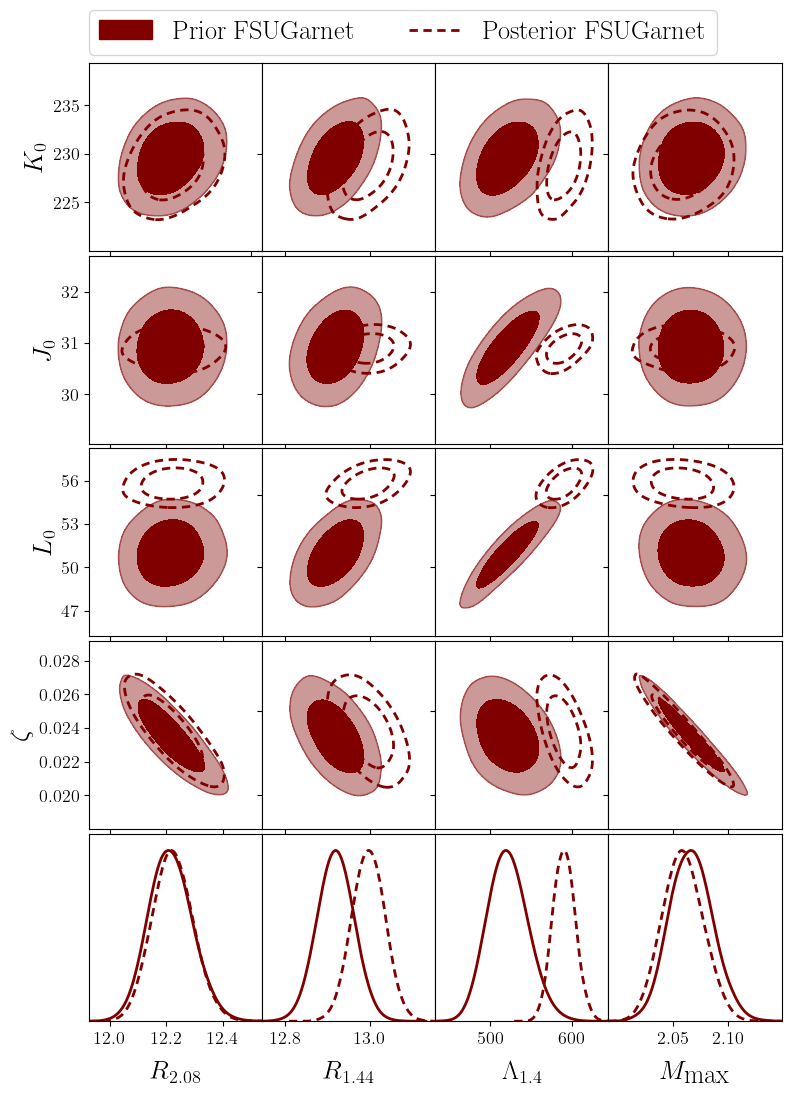

In [9]:
plt.rcParams.update({
    'text.usetex': True,
    'font.family': 'serif',
    'font.serif': ['Computer Modern'],
    'font.size': 14,
    'axes.titlesize': 14,
    'axes.labelsize': 16,
    'xtick.labelsize': 17,
    'ytick.labelsize': 17,
    'legend.fontsize': 16,
    'text.latex.preamble': r'\usepackage{bm}',
})

cols = [3,4,5,6,7,8,12,13]
priorGARNET = priorgarnet[:,cols]
postGARNET_X = postgarnet_X[:,cols]

names = ['K', 'J', 'L', 'zeta','R1.44','R2.08','TD1.4','Mmax']
labels =  ['K_0', 'J_0', 'L_0', r'\zeta',r'R_{1.44}',r'R_{2.08}',r'\Lambda_{1.4}',r'M_\textrm{max}']
samp_prior_garn = MCSamples(samples=priorGARNET,names = names, labels=labels)
samp_postX_garn = MCSamples(samples=postGARNET_X,names = names, labels=labels)

data = [samp_prior_garn,samp_postX_garn]
fillsett = [True,False]
colorsett = ['maroon','maroon']
linestyle = ['-','--']
linesize = [2,2]

f = plots.get_subplot_plotter()
f.settings.title_limit_fontsize = 12
f.settings.axes_fontsize = 16
f.settings.axes_labelsize = 22
f.settings.legend_fontsize = 22
f.make_figure(nplot=24,nx=4,ny=5,sharex=True,sharey=True)
f.plot_2d(data,['R2.08','K'],ax=[0,0],do_xlabel=False,no_label_no_numbers=True,filled=fillsett,colors=colorsett,ls=linestyle,lws=linesize)
f.plot_2d(data,'R1.44','K',ax=[0,1],do_ylabel=False,no_label_no_numbers=True,filled=fillsett,colors=colorsett,ls=linestyle,lws=linesize)
f.plot_2d(data,'TD1.4','K',ax=[0,2],do_ylabel=False,no_label_no_numbers=True,filled=fillsett,colors=colorsett,ls=linestyle,lws=linesize)
f.plot_2d(data,'Mmax','K',ax=[0,3],do_ylabel=False,no_label_no_numbers=True,filled=fillsett,colors=colorsett,ls=linestyle,lws=linesize)
f.plot_2d(data,'R2.08','J',ax=[1,0],filled=fillsett,colors=colorsett,ls=linestyle,lws=linesize)
f.plot_2d(data,'R1.44','J',ax=[1,1],do_ylabel=False,no_label_no_numbers=True,filled=fillsett,colors=colorsett,ls=linestyle,lws=linesize)
f.plot_2d(data,'TD1.4','J',ax=[1,2],do_ylabel=False,no_label_no_numbers=True,filled=fillsett,colors=colorsett,ls=linestyle,lws=linesize)
f.plot_2d(data,'Mmax','J',ax=[1,3],do_ylabel=False,no_label_no_numbers=True,filled=fillsett,colors=colorsett,ls=linestyle,lws=linesize)
f.plot_2d(data,'R2.08','L',ax=[2,0],filled=fillsett,colors=colorsett,ls=linestyle,lws=linesize)
f.plot_2d(data,'R1.44','L',ax=[2,1],do_ylabel=False,no_label_no_numbers=True,filled=fillsett,colors=colorsett,ls=linestyle,lws=linesize)
f.plot_2d(data,'TD1.4','L',ax=[2,2],do_ylabel=False,no_label_no_numbers=True,filled=fillsett,colors=colorsett,ls=linestyle,lws=linesize)
f.plot_2d(data,'Mmax','L',ax=[2,3],do_ylabel=False,no_label_no_numbers=True,filled=fillsett,colors=colorsett,ls=linestyle,lws=linesize)
f.plot_2d(data,'R2.08','zeta',ax=[3,0],filled=fillsett,colors=colorsett,ls=linestyle,lws=linesize)
f.plot_2d(data,'R1.44','zeta',ax=[3,1],do_ylabel=False,no_label_no_numbers=True,filled=fillsett,colors=colorsett,ls=linestyle,lws=linesize)
f.plot_2d(data,'TD1.4','zeta',ax=[3,2],do_ylabel=False,no_label_no_numbers=True,filled=fillsett,colors=colorsett,ls=linestyle,lws=linesize)
f.plot_2d(data,'Mmax','zeta',ax=[3,3],do_ylabel=False,no_label_no_numbers=True,filled=fillsett,colors=colorsett,ls=linestyle,lws=linesize)
f.plot_1d(data,'R2.08',ax=[4,0],colors=colorsett,ls=linestyle,lws=linesize)
f.plot_1d(data,'R1.44',ax=[4,1],do_ylabel=False,colors=colorsett,ls=linestyle,lws=linesize)
f.plot_1d(data,'TD1.4',ax=[4,2],do_ylabel=False,colors=colorsett,ls=linestyle,lws=linesize)
f.plot_1d(data,'Mmax',ax=[4,3],do_ylabel=False,colors=colorsett,ls=linestyle,lws=linesize)
f.add_legend(legend_labels=['Prior FSUGarnet','Posterior FSUGarnet'], legend_ncol=3,legend_loc=[-3.0,5.15])
#f._tight_layout()

f.fig.savefig('Figure10b.png',transparent=False,facecolor='white', pad_inches=0.5,bbox_inches='tight',dpi=500)

Removed no burn in
Removed no burn in


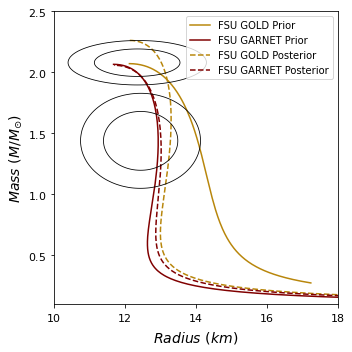

In [13]:
# Adjust for the maximum masses
gol = 426
gar = 390

gol_x = 372
gar_x = 397

# Get a sample of the mass/radius distribution
ndim = 2
nsamp = 100000
random_state = np.random.default_rng(10) # seed random generator
cov = [[0.75**2,0],[0,0.07**2]]
samps = random_state.multivariate_normal([12.35,2.08], cov, size=nsamp)
cov = [[0.65**2,0],[0,0.15**2]]
samps2 = random_state.multivariate_normal([12.45,1.44], cov, size=nsamp)

names = ['R','M']
labels = ['Radius \ (km)',r'Mass \ (M/M_{\odot})']
samples = MCSamples(samples=samps,names = names, labels = labels,settings={'smooth_scale_2D':0.9,'fine_bins_2D':100})
samples2 = MCSamples(samples=samps2,names = names, labels = labels,settings={'smooth_scale_2D':0.9,'fine_bins_2D':100})

# Plot mass and radisu with error contours
g = plots.get_subplot_plotter(width_inch=5)
samples.updateSettings({'contours': [0.68, 0.95]})
g.plot_2d([samples, samples2],'R', 'M', labels = labels, lims=[10,18,0.1,2.5],colors=['black','black'],ls=['-','-'],lws=[0.8,0.8])
g.add_line(goldMR[:gol,2],goldMR[:gol,3],ls='solid',color='darkgoldenrod')
g.add_line(garnetMR[:gar,2],garnetMR[:gar,3],ls='solid',color='maroon')
g.add_line(goldMR_XEFT[:gol_x,2],goldMR_XEFT[:gol_x,3],ls='dashed',color='darkgoldenrod')
g.add_line(garnetMR_XEFT[:gar_x,2],garnetMR_XEFT[:gar_x,3],ls='dashed',color='maroon')

g.export('RM_Observ_XEFT.png',transparent=False,facecolor='white')
plt.legend(['FSU GOLD Prior','FSU GARNET Prior','FSU GOLD Posterior','FSU GARNET Posterior'])

/var/folders/c7/z26l7xyn1cnb0595y6v37x8c0000gn/T/ipykernel_7703/3200898865.py:96: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/var/folders/c7/z26l7xyn1cnb0595y6v37x8c0000gn/T/ipykernel_7703/3200898865.py:96: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


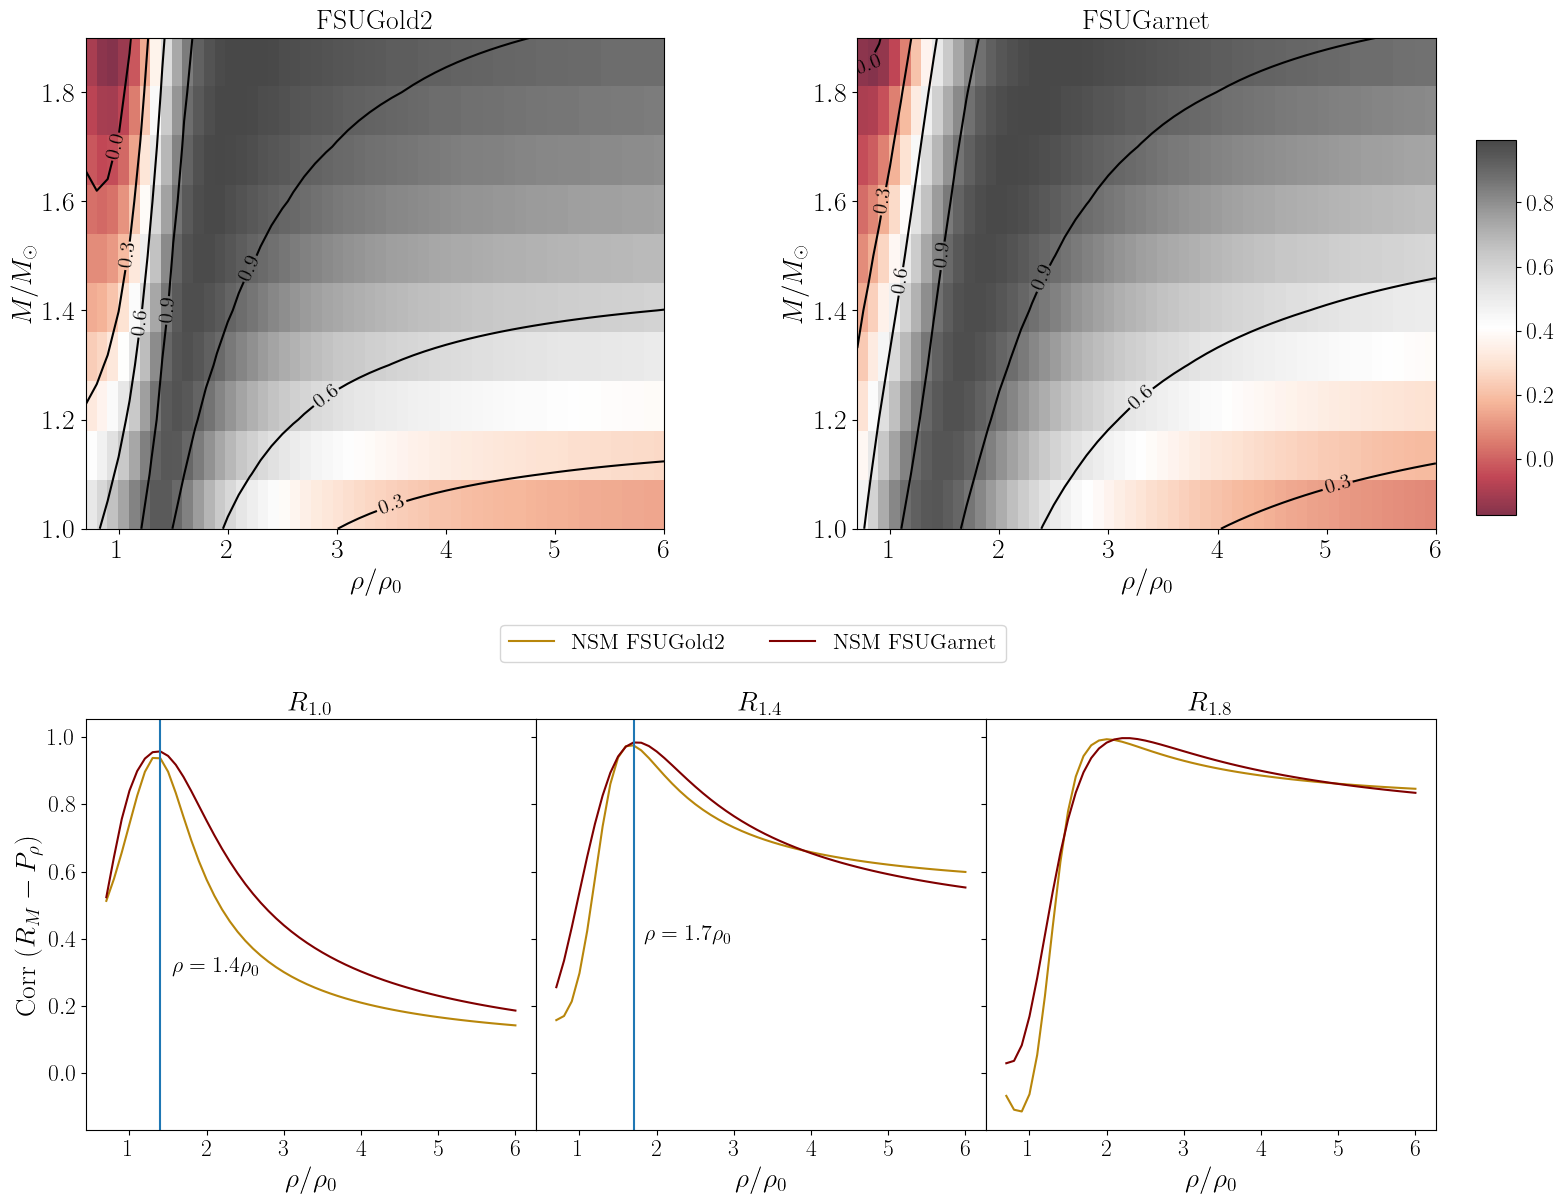

In [52]:
plt.rcParams.update({
    'text.usetex': True,
    'font.family': 'serif',
    'font.serif': ['Computer Modern'],
    'font.size': 14,
    'axes.titlesize': 14,
    'axes.labelsize': 16,
    'xtick.labelsize': 17,
    'ytick.labelsize': 17,
    'legend.fontsize': 16,
    'text.latex.preamble': r'\usepackage{bm}',
})

# import correlations
from matplotlib.gridspec import GridSpec
gold_bem_dens = np.loadtxt("CORR_BEM_dens_GOLD.txt")
garn_bem_dens = np.loadtxt("CORR_BEM_dens_GARNET.txt")

# specify x and y axis data
radii = [1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9]
dens = gold_bem_dens[:,0]

# transpose data
goldbem = np.transpose(gold_bem_dens[:,2:12])
garnbem = np.transpose(garn_bem_dens[:,2:12])

# setup the plotting grid and place subplots
fig = plt.figure(figsize=(20, 15))
gs = GridSpec(2, 21, width_ratios=[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1], height_ratios=[1.5,1])
ax1 = fig.add_subplot(gs[0,:9])
ax2 = fig.add_subplot(gs[0,12:])
ax3 = fig.add_subplot(gs[1:,0:7])
ax4 = fig.add_subplot(gs[1:,7:14], sharey=ax3)
ax5 = fig.add_subplot(gs[1:,14:], sharey=ax3)

# get rid of y ticks for second row plots and adjust spacings
plt.setp(ax4.get_yticklabels(), visible=False)
plt.setp(ax5.get_yticklabels(), visible=False)
plt.subplots_adjust(wspace=.0, hspace=0.25)

# contour plots
contours1 = ax1.contour(dens, radii, goldbem, 3, colors='black')
contours2 = ax2.contour(dens, radii, garnbem, 3, colors='black')

# contour plots settings 
ax1.clabel(contours1, inline=True, fontsize=15)
ax2.clabel(contours2, inline=True, fontsize=15)
goldplot = ax1.imshow(goldbem, extent=[0.7, 6, 1.0, 1.9], origin='lower',
           cmap='RdGy', aspect=5, alpha=0.8)
garnplot = ax2.imshow(garnbem, extent=[0.7, 6, 1.0, 1.9], origin='lower',
           cmap='RdGy', aspect=5, alpha=0.8)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.52, 0.02, 0.25])
fig.colorbar(goldplot, cax=cbar_ax)

# plot the contour cross sections
ax3.plot(gold_bem_dens[:,0],gold_bem_dens[:,2],color='darkgoldenrod')
ax3.plot(garn_bem_dens[:,0],garn_bem_dens[:,2],color='maroon')

ax4.plot(gold_bem_dens[:,0],gold_bem_dens[:,6],color='darkgoldenrod')
ax4.plot(garn_bem_dens[:,0],garn_bem_dens[:,6],color='maroon')

ax5.plot(gold_bem_dens[:,0],gold_bem_dens[:,10],color='darkgoldenrod')
ax5.plot(garn_bem_dens[:,0],garn_bem_dens[:,10],color='maroon')

# axes and plot labels
ax1.set_xlabel(r'$\rho / \rho_0 $', fontsize=20)
ax2.set_xlabel(r'$\rho / \rho_0 $', fontsize=20)
ax3.set_xlabel(r'$\rho / \rho_0 $', fontsize=20)
ax4.set_xlabel(r'$\rho / \rho_0 $', fontsize=20)
ax5.set_xlabel(r'$\rho / \rho_0 $', fontsize=20)

ax1.set_title('FSUGold2', fontsize=20)
ax2.set_title('FSUGarnet', fontsize=20)
ax3.set_title(r'$R_{1.0}$', fontsize=20)
ax4.set_title(r'$R_{1.4}$', fontsize=20)
ax5.set_title(r'$R_{1.8}$', fontsize=20)

ax1.set_ylabel(r'$M / M_{\odot}$', fontsize=20)
ax2.set_ylabel(r'$M / M_{\odot}$', fontsize=20)
ax3.set_ylabel(r'Corr $(R_M - P_{\rho})$', fontsize=20)

ax3.axvline(x=1.4)
ax4.axvline(x=1.7)
plt.text(-32.6,-1.6,r'$\rho = 1.4 \rho_0$', fontsize=16)
plt.text(-20.8,-1.5,r'$\rho = 1.7 \rho_0$', fontsize=16)

ax1.tick_params(axis='both', which='major', labelsize=20)
ax2.tick_params(axis='both', which='major', labelsize=20)
ax3.tick_params(axis='both', which='major', labelsize=17)
ax4.tick_params(axis='both', which='major', labelsize=17)
ax5.tick_params(axis='both', which='major', labelsize=17)

fig.legend(['NSM FSUGold2','NSM FSUGarnet',],ncol=4,loc=[0.32,0.45],fontsize=16)
plt.tight_layout()
plt.savefig('Figure13.png',transparent=False,facecolor='white',bbox_inches='tight',dpi=500)

/var/folders/c7/z26l7xyn1cnb0595y6v37x8c0000gn/T/ipykernel_7703/2199614525.py:71: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


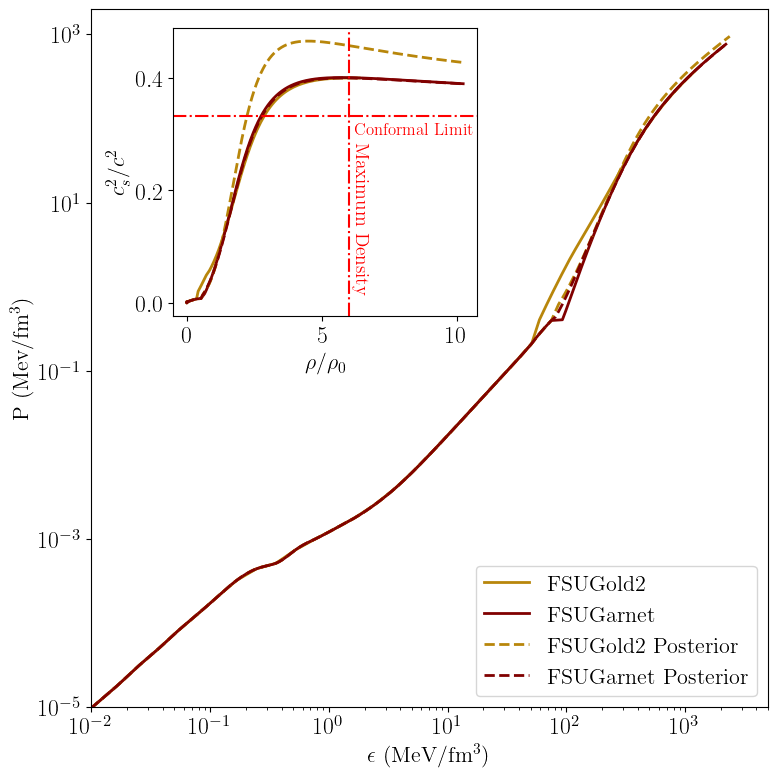

In [50]:
# Set font to a more professional style
plt.rcParams.update({
    'text.usetex': True,
    'font.family': 'serif',
    'font.serif': ['Computer Modern'],
    'font.size': 14,
    'axes.titlesize': 14,
    'axes.labelsize': 16,
    'xtick.labelsize': 17,
    'ytick.labelsize': 17,
    'legend.fontsize': 16,
    'text.latex.preamble': r'\usepackage{bm}',
})


goldXEFTEOS = np.loadtxt("FSUGOLD_XEFT_EOS.txt")
garnetXEFTEOS = np.loadtxt("FSUGARNET_XEFT_EOS.txt")
goldEOS = np.loadtxt("FSUGOLD_EOS.txt")
garnetEOS = np.loadtxt("FSUGARNET_EOS.txt")

# Adjust end of data
gold = 2651 #0.903
garn = 2563 #0.934
goldx = 2534 #0.847
garnx = 2590 #0.917

# Adjust start of data
gold = 2651
garn = 2563
goldx = 2534
garnx = 2590

# plot XEFT data and FSU PNM EOS
fig, ax1 = plt.subplots(1,1,figsize=(8,8))
ax1.plot(goldEOS[:,1],goldEOS[:,2],color='darkgoldenrod',linewidth=2)
ax1.plot(garnetEOS[:,1],garnetEOS[:,2],color='maroon',linewidth=2)
ax1.plot(goldXEFTEOS[:,1],goldXEFTEOS[:,2],color='darkgoldenrod',linewidth=2,ls='dashed')
ax1.plot(garnetXEFTEOS[:,1],garnetXEFTEOS[:,2],color='maroon',linewidth=2,ls='dashed')
#axs[0,1].axhline(y = 0.333, color = 'r', linestyle = '-.')
#axs[1,1].axhline(y = 0.333, color = 'r', linestyle = '-.')
#axs[0,1].annotate(r'$c_s^2 /c^2 = 1/3$', xy=(0.05, 0.35), xytext=(0.05, 0.35))
#axs[1,1].annotate(r'$c_s^2 /c^2 = 1/3$', xy=(0.05, 0.35), xytext=(0.05, 0.35))


ax1.legend(['FSUGold2','FSUGarnet','FSUGold2 Posterior','FSUGarnet Posterior'],loc='lower right',fontsize=16)
ax1.set(xlabel=r'$\epsilon$ (MeV/fm$^3$)',ylabel=r'P (Mev/fm$^3)$')
ax1.set_ylim([10**(-5),2*10**3])
ax1.set_xlim([10**(-2),5*10**3])
ax1.set_xscale('log')
ax1.set_yscale('log')

goldEOS[:,0] = goldEOS[:,0]/0.15
garnetEOS[:,0] = garnetEOS[:,0]/0.15
goldXEFTEOS[:,0] = goldXEFTEOS[:,0]/0.15
garnetXEFTEOS[:,0] = garnetXEFTEOS[:,0]/0.15
left, bottom, width, height = [0.23, 0.59, 0.38, 0.36]
ax2 = fig.add_axes([left, bottom, width, height])
ax2.plot(goldEOS[:,0],goldEOS[:,3],color='darkgoldenrod',linewidth=2)
ax2.plot(garnetEOS[:,0],garnetEOS[:,3],color='maroon',linewidth=2)
ax2.plot(goldXEFTEOS[:,0],goldXEFTEOS[:,3],color='darkgoldenrod',linewidth=2,ls='dashed')
ax2.plot(garnetXEFTEOS[:,0],garnetXEFTEOS[:,3],color='maroon',linewidth=2,ls='dashed')
ax2.set(xlabel=r'$\rho / \rho_0$',ylabel=r'$c_s^2/c^2$')
ax2.axhline(y = 0.333, color = 'r', linestyle = '-.')
ax2.axvline(x = 6.0, color = 'r', linestyle = '-.')
ax2.annotate(r'Conformal Limit', xy=(6.2, 0.3), xytext=(6.2, 0.3),color='red',fontsize=12)
ax2.annotate(r'Maximum Density', xy=(6.1, 0.04), xytext=(6.1, 0.02),color='red',rotation=270)
plt.rc('axes', labelsize=20)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=18)    # fontsize of the tick labels
plt.rc('ytick', labelsize=18)    # fontsize of the tick labels

plt.tight_layout()
plt.savefig('Figure12.png',transparent=False,facecolor='white',dpi=500)

Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


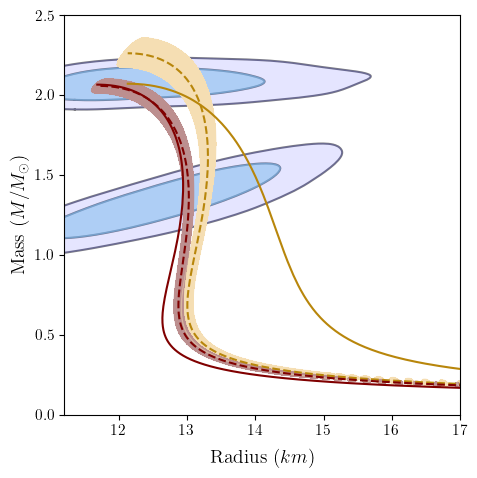

In [31]:
# Set font to a more professional style
plt.rcParams.update({
    'text.usetex': True,
    'font.family': 'serif',
    'font.serif': ['Computer Modern'],
    'font.size': 14,
    'axes.titlesize': 14,
    'axes.labelsize': 16,
    'xtick.labelsize': 15,
    'ytick.labelsize': 15,
    'legend.fontsize': 14,
    'text.latex.preamble': r'\usepackage{bm}',
})


garnpost = np.loadtxt("MR_BAND_GARNET_XEFT.txt")
goldpost = np.loadtxt("MR_BAND_GOLD_XEFT.txt")
J0030_68 = np.loadtxt("J0030_Riley19_NICERonly_STPST_68.txt")
J0030_95 = np.loadtxt("J0030_Riley19_NICERonly_STPST_95.txt")
J0740_68 = np.loadtxt("J0740_Riley21_68.txt")
J0740_95 = np.loadtxt("J0740_Riley21_95.txt")

# Get a sample of the mass/radius distribution
ndim = 2
nsamp = 100000
random_state = np.random.default_rng(10) # seed random generator
cov = [[0.75**2,0],[0,0.07**2]]
samps = random_state.multivariate_normal([12.35,2.08], cov, size=nsamp)
cov = [[0.65**2,0],[0,0.15**2]]
samps2 = random_state.multivariate_normal([12.45,1.44], cov, size=nsamp)

names = ['R','M']
labels = [r'\textrm{Radius} \ (km)',r'\textrm{Mass} \ (M/M_{\odot})']
samplesMR1 = MCSamples(samples=garnpost[:,[4,5]],names = names, labels=labels,settings={'fine_bins_2D':1000})
samplesMR2 = MCSamples(samples=goldpost[:,[4,5]],names = names, labels=labels,settings={'fine_bins_2D':1000})
samples = MCSamples(samples=samps,names = names, labels = labels,settings={'smooth_scale_2D':0.9,'fine_bins_2D':100})
samples2 = MCSamples(samples=samps2,names = names, labels = labels,settings={'smooth_scale_2D':0.9,'fine_bins_2D':100})

g = plots.get_subplot_plotter(width_inch=5)

gol = 426
gar = 390
gol_x = 372
gar_x = 397

g.add_line(J0030_68[:,0],J0030_68[:,1],ls='solid')
g.add_line(J0030_95[:,0],J0030_95[:,1],ls='solid')
g.add_line(J0740_68[:,0],J0740_68[:,1],ls='solid')
g.add_line(J0740_95[:,0],J0740_95[:,1],ls='solid')

g.add_line(goldMR[:gol,2],goldMR[:gol,3],ls='solid',color='darkgoldenrod',zorder=5)
g.add_line(garnetMR[:gar,2],garnetMR[:gar,3],ls='solid',color='maroon',zorder=5)
g.add_line(goldMR_XEFT[:gol_x,2],goldMR_XEFT[:gol_x,3],ls='dashed',color='darkgoldenrod',zorder=5)
g.add_line(garnetMR_XEFT[:gar_x,2],garnetMR_XEFT[:gar_x,3],ls='dashed',color='maroon',zorder=5)

ax = g.fig.axes[0]
ax.fill(J0030_68[:,0],J0030_68[:,1], color='skyblue', alpha=0.5)
ax.fill(J0030_95[:,0],J0030_95[:,1], color='blue', alpha=0.1)
ax.fill(J0740_68[:,0],J0740_68[:,1], color='skyblue', alpha=0.5)
ax.fill(J0740_95[:,0],J0740_95[:,1], color='blue', alpha=0.1)

samplesMR2.updateSettings({'contours': [0.95]})
g.plot_2d([samplesMR2],'R','M',filled=True,colors=['wheat'],lims=[11.2,17,0,2.5])

samplesMR1.updateSettings({'contours': [0.95]})
g.plot_2d([samplesMR1],'R','M',filled=True,colors=['rosybrown'],lims=[11.2,17,0,2.5])

g.fig.savefig('Figure11a.png',transparent=False,facecolor='white',dpi=500)

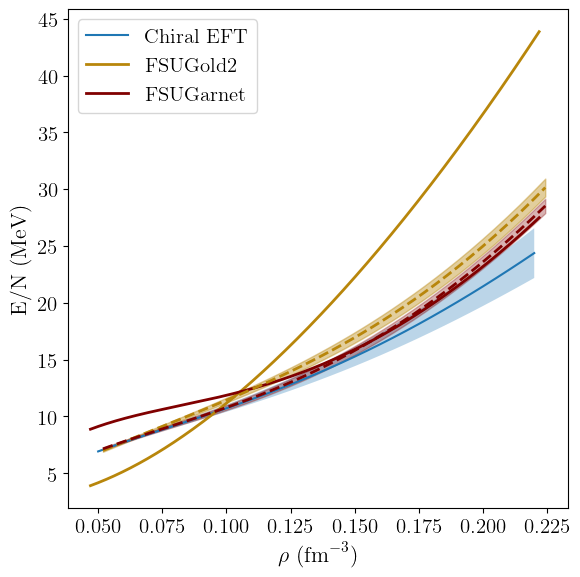

In [38]:
plt.rcParams.update({
    'text.usetex': True,
    'font.family': 'serif',
    'font.serif': ['Computer Modern'],
    'font.size': 14,
    'axes.titlesize': 14,
    'axes.labelsize': 16,
    'xtick.labelsize': 15,
    'ytick.labelsize': 15,
    'legend.fontsize': 14,
    'text.latex.preamble': r'\usepackage{bm}',
})

import numpy as np
goldPNM_XEFT = np.loadtxt("EOS_BAND_GOLD_XEFT.txt")
garnetPNM_XEFT = np.loadtxt("EOS_BAND_GARN_XEFT.txt")

# Adjust end of XEFT data
n = 35

# Adjust start and end of EOS data
l = 78 #78
m = 132 #132

a = 500
b = 870

x = data[0:n,0]
y = data[0:n,1]
error1 = data[0:n,2]
errorgold = 2*goldPNM_XEFT[l:m,2]
errorgarn = 2*garnetPNM_XEFT[l:m,2]

# plot XEFT data and FSU PNM EOS
plt.figure(figsize=(6,6),facecolor='white')
plt.plot(x,y)
plt.plot(goldPNM[a:b,0],goldPNM[a:b,3],color='darkgoldenrod',linewidth=2)
plt.plot(garnetPNM[a:b,0],garnetPNM[a:b,3],color='maroon',linewidth=2)
plt.plot(goldPNM_XEFT[l:m,0],goldPNM_XEFT[l:m,1],color='darkgoldenrod',linewidth=2, linestyle='dashed')
plt.plot(garnetPNM_XEFT[l:m,0],garnetPNM_XEFT[l:m,1],color='maroon',linewidth=2, linestyle='dashed')
plt.fill_between(x, y-error1, y+error1, alpha=0.3)
plt.fill_between(goldPNM_XEFT[l:m,0], goldPNM_XEFT[l:m,1]-errorgold, goldPNM_XEFT[l:m,1]+errorgold, alpha=0.4, color='darkgoldenrod')
plt.fill_between(garnetPNM_XEFT[l:m,0], garnetPNM_XEFT[l:m,1]-errorgarn, garnetPNM_XEFT[l:m,1]+errorgarn, alpha=0.3, color='maroon')
plt.legend(['Chiral EFT','FSUGold2','FSUGarnet'],fontsize=15)
plt.xlabel(r'$\rho$ ($\textrm{fm}^{-3}$)')
plt.ylabel('E/N (MeV)')
plt.rc('axes', labelsize=19)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=14)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14)    # fontsize of the tick labels
plt.tight_layout()
plt.savefig('Figure11b',dpi=500)

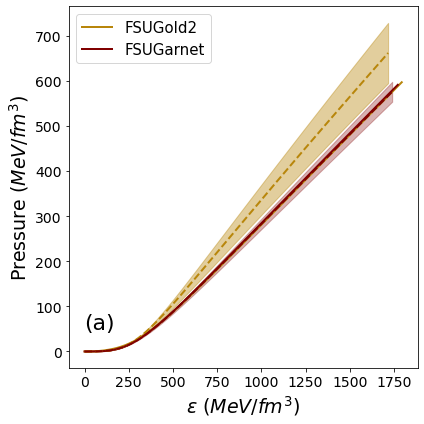

In [19]:
goldPNM_XEFT = np.loadtxt("EOS_BAND_NSM_FSUGOLD2R.txt")
garnetPNM_XEFT = np.loadtxt("EOS_BAND_NSM_FSUGARNETR.txt")
goldPNM = np.loadtxt("FSUGOLD_EOS.txt")
garnetPNM = np.loadtxt("FSUGARNET_EOS.txt")

# Adjust start and end of EOS data
ogld = 1900
xgld = 280
ogar = 2750
xgar = 285

errorgold = 2*goldPNM_XEFT[:xgld,2]
errorgarn = 2*garnetPNM_XEFT[:xgar,2]

# plot XEFT data and FSU PNM EOS
plt.figure(figsize=(6,6))
plt.plot(goldPNM[:ogld,1],goldPNM[:ogld,2],color='darkgoldenrod',linewidth=2)
plt.plot(garnetPNM[:ogar,1],garnetPNM[:ogar,2],color='maroon',linewidth=2)
plt.plot(goldPNM_XEFT[:xgld,0],goldPNM_XEFT[:xgld,1],color='darkgoldenrod',linewidth=2, linestyle='dashed')
plt.plot(garnetPNM_XEFT[:xgar,0],garnetPNM_XEFT[:xgar,1],color='maroon',linewidth=2, linestyle='dashed')
plt.fill_between(goldPNM_XEFT[:xgld,0], goldPNM_XEFT[:xgld,1]-errorgold, goldPNM_XEFT[:xgld,1]+errorgold, alpha=0.4, color='darkgoldenrod')
plt.fill_between(garnetPNM_XEFT[:xgar,0], garnetPNM_XEFT[:xgar,1]-errorgarn, garnetPNM_XEFT[:xgar,1]+errorgarn, alpha=0.3, color='maroon')
plt.legend(['FSUGold2','FSUGarnet'],fontsize=15)
plt.xlabel(r'$\epsilon$ ($MeV/fm^{3}$)')
plt.ylabel(r'Pressure ($MeV/fm^{3}$)')
plt.rc('axes', labelsize=19)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=14)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14)    # fontsize of the tick labels
#plt.yscale('log')
#plt.xscale('log')
plt.text(-0.95,50,"(a)",fontsize=22)
plt.tight_layout()
plt.savefig('EOS_NSM_BAND.png',transparent=False,facecolor='white')

Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


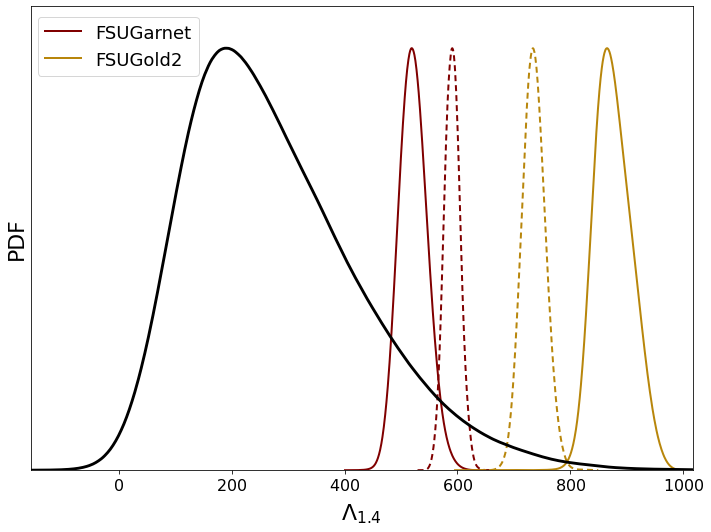

In [5]:
cols = [12]
priorGARNET = priorgarnet[:,cols]
postGARNET_X = postgarnet_X[:,cols]
priorGOLD = priorgold[:,cols]
postGOLD_X = postgold_X[:,cols]

names = ['TD1.4']
labels =  [r'\Lambda_{1.4}']
samp_prior_gold = MCSamples(samples=priorGOLD,names = names, labels=labels)
samp_postX_gold = MCSamples(samples=postGOLD_X,names = names, labels=labels)
samp_prior_garn = MCSamples(samples=priorGARNET,names = names, labels=labels)
samp_postX_garn = MCSamples(samples=postGARNET_X,names = names, labels=labels)

# Add observational measurements 
nsamp = 100000
random_state = np.random.default_rng(10) # seed random generator
samp14TD = ss.skewnorm.rvs(4,loc=87,scale=247,size=nsamp)
samples14TD = MCSamples(samples=samp14TD,names = names, labels = labels)

data = [samp_prior_garn,samp_prior_gold,samp_postX_garn,samp_postX_gold,samples14TD]
colorsett = ['maroon','darkgoldenrod','maroon','darkgoldenrod','black']
linestyle = ['-','-','--','--']
linesize = [2,2,2,2]

f = plots.get_single_plotter(width_inch=10)
f.settings.title_limit_fontsize = 12
f.settings.axes_fontsize = 16
f.settings.axes_labelsize = 22
f.settings.legend_fontsize = 18
f.plot_1d(data,'TD1.4',do_ylabel=False,colors=colorsett,ls=linestyle,lws=linesize)
f.add_legend(legend_labels=['FSUGarnet','FSUGold2'], legend_ncol=1,legend_loc=[0.01,0.85])
#f._tight_layout()

f.export('TD14.png',transparent=False,facecolor='white', pad_inches=0.5,bbox_inches='tight')

In [7]:
import scipy.stats as ss
import numpy as np
from scipy import integrate
x = np.linspace(190-120,190+380,num=10000)
y = ss.skewnorm.pdf(x,4,loc=87,scale=247)
y_int = integrate.cumtrapz(y, x, initial=0)
print(y_int)


[0.00000000e+00 6.31220669e-05 1.26295148e-04 ... 8.95887631e-01
 8.95911519e-01 8.95935397e-01]


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


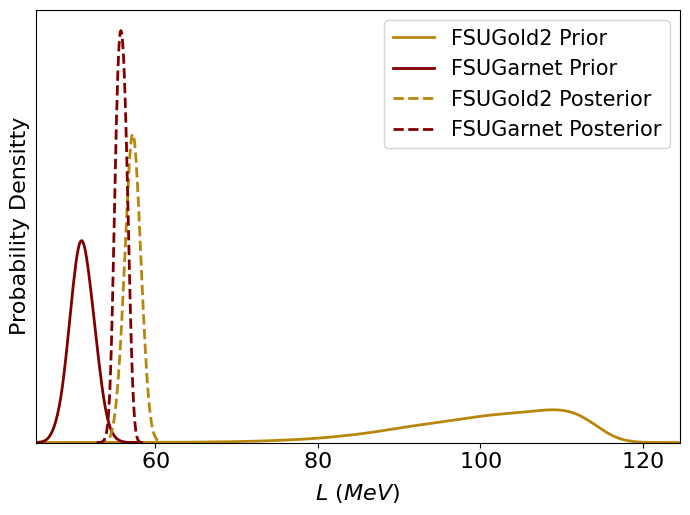

In [52]:
# Tag specific columns to plot
cols =  [5]
priorGOLD = priorgold[:,cols]
postGOLD_X = postgold_X[:,cols]
priorGARNET = priorgarnet[:,cols]
postGARNET_X = postgarnet_X[:,cols]
names = ['L']
labels =  [r'L \, \, (MeV)']
samp_prior_gold = MCSamples(samples=priorGOLD,names = names, labels = labels)
samp_postX_gold = MCSamples(samples=postGOLD_X,names = names, labels = labels)
samp_prior_garnet = MCSamples(samples=priorGARNET,names = names, labels = labels)
samp_postX_garnet = MCSamples(samples=postGARNET_X,names = names, labels = labels)

# Properties of plot
data = [samp_prior_gold,samp_prior_garnet,samp_postX_gold,samp_postX_garnet]
vars = ['L']
leglabel = ['FSUGold2 Prior','FSUGarnet Prior','FSUGold2 Posterior','FSUGarnet Posterior']
colorsett = ['darkgoldenrod','maroon','darkgoldenrod','maroon']
linestyle = ['-','-','dashed','dashed']
linesize = [2,2,2,2]
xlim = [[40,125]]

f = plots.get_single_plotter(width_inch=7)
f.settings.title_limit_fontsize = 12
f.settings.axes_fontsize = 16
f.settings.axes_labelsize = 16
f.settings.legend_fontsize = 15
f.settings.norm_prob_label = 'Probability Densitty'
f.plot_1d(data,'L',do_ylabel=True,colors=colorsett,ls=linestyle,lws=linesize,normalized=True,xlims=xlim)
f.add_legend(legend_labels=leglabel, legend_ncol=1,legend_loc='upper right')
f.export('LLNL.png',transparent=False,facecolor='white',dpi=300)